In [1]:
import os, sys, glob
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

plt.style.use('science')

sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/se2dr/se2wave/utils/python/")
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/LibFolder")

from Lib_GeneralFunctions import *
from Lib_ProfilePlotting import *
from Lib_ProfileProcessing import *
from Lib_SigmoidProcessing import *
from Lib_SpectrogramPlot import *
from Lib_GeneralSignalProcNAnalysis import *
from Lib_MatlabReader import *
from GeneratePaperFigs import LabelizeAxisList

import pandas as pd

In [2]:
def FormatLineLabels(Axis, LabelList, **kwargs):
    Lines = Axis.get_lines()
    legend2 = Axis.legend(Lines, LabelList , **kwargs)
    Axis.add_artist(legend2)

In [3]:
from palettable.cartocolors.qualitative import Safe_3_r as ElColor
cmap = ElColor.mpl_colors

from palettable.scientific.sequential import Nuuk_20 as ElColor
cmapCont = ElColor.mpl_colormap

In [4]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18
FontSizeControlFreak(SMALL_SIZE,MEDIUM_SIZE,BIGGER_SIZE)

In [5]:
FolderPath = '/home/nico/LRZ Sync+Share/SharedWolfel/PaperData/ReceiverData/'
SpecificFolder = '20220130/'
Filename = 'Receivers_TEAR14_TPV3_T0_P3_025x025_A12phi65_7Sec_21460_d25.025.pickle'
ListReceivers = LoadPickleFile(FolderPath+SpecificFolder, Filename)

ListReceivers

[SingleTimeProfile([0, 25.025]),
 SingleTimeProfile([2000, 25.025]),
 SingleTimeProfile([4000, 25.025]),
 SingleTimeProfile([6000, 25.025]),
 SingleTimeProfile([8000, 25.025]),
 SingleTimeProfile([0, 25]),
 SingleTimeProfile([2000, 25]),
 SingleTimeProfile([4000, 25]),
 SingleTimeProfile([6000, 25]),
 SingleTimeProfile([8000, 25]),
 SingleTimeProfile([0, 50]),
 SingleTimeProfile([2000, 50]),
 SingleTimeProfile([4000, 50]),
 SingleTimeProfile([6000, 50]),
 SingleTimeProfile([8000, 50]),
 SingleTimeProfile([0, 100]),
 SingleTimeProfile([2000, 100]),
 SingleTimeProfile([4000, 100]),
 SingleTimeProfile([6000, 100]),
 SingleTimeProfile([8000, 100]),
 SingleTimeProfile([0, 200]),
 SingleTimeProfile([2000, 200]),
 SingleTimeProfile([4000, 200]),
 SingleTimeProfile([6000, 200]),
 SingleTimeProfile([8000, 200]),
 SingleTimeProfile([0, 300]),
 SingleTimeProfile([2000, 300]),
 SingleTimeProfile([4000, 300]),
 SingleTimeProfile([6000, 300]),
 SingleTimeProfile([8000, 300]),
 SingleTimeProfile([0, 

# Reference

In [6]:
def PopulateReference(MatlabStruct,VelMatlabStruct,RecI):

    MyReceiver = SingleReceiver((MatlabStruct["x"][RecI][0],MatlabStruct["z"][RecI][0]))

    [MyReceiver.appendFieldValues(time=MatlabStruct["dt"]*TimeIdx, 
                                 dispx=MatlabStruct["Field_x"][TimeIdx][RecI], 
                                 dispy=MatlabStruct["Field_z"][TimeIdx][RecI],
                                 velx=VelMatlabStruct["Field_x"][TimeIdx][RecI],
                                 vely=VelMatlabStruct["Field_z"][TimeIdx][RecI]) 
     for TimeIdx in range(MatlabStruct["nt"])]
    
    return MyReceiver

def PlotReference(ListReferenceReceivers,ax,Gradient=True):
    ColIdx = 0
    for i in [0,7]: # Y location index
        ColIdx += 1
        Ycoord = ListReferenceReceivers[i].Coord[1]
        Xcoord = ListReferenceReceivers[i].Coord[0]

        Time, Amplitude = SortReceiver(ListReferenceReceivers[i],ListReferenceReceivers[i].VelY)
        if (Gradient):
            Amplitude = np.asarray(pd.Series(np.gradient(Amplitude, Time).tolist()))

        print(ListReferenceReceivers[i].Coord)

        FreqSamp= 1/(Time[3]-Time[2])
        ax.magnitude_spectrum(Amplitude,FreqSamp,ls='--',color = cmap[ColIdx])

MatlabStruct = ReadSEM2DPACKFieldStructure(FolderPath+"Reference/","UFieldStruct.mat")
VelMatlabStruct = ReadSEM2DPACKFieldStructure(FolderPath+"Reference/","VFieldStruct.mat")

ListReferenceReceivers = [PopulateReference(MatlabStruct, VelMatlabStruct, RecI) for RecI in range(int(MatlabStruct["nsta"]))]

In [7]:
def Format_ProfilePlot(Label, ax, ListReceivers, StationIDX, scaling, nstat):
    axT = ax.twinx()
    axT.set_ylim(ax.get_ylim())

    axT.set_ylabel(Label)

    ax.set_yticks([ListReceivers[StationIDX+5*j].Coord[1]/scaling for j in range(1,nstat)])
    ax.set_yticklabels([ListReceivers[StationIDX+5*j].Coord[1] for j in range(1,nstat)])
    ax.set_ylabel("$y$ [m]")
    ax.set_xlabel("time [s]")

def Format_PlotMagnitudeSpectra(ax):
    ax.set_yscale('log')
    ax.set_xscale('log')

    ax.set_ylim([0.00001,0.1])
    ax.set_ylabel("Amplitude spectrum")
    ax.set_xlabel("Frequency [Hz]")
    ax.legend(title='Receivers location', loc=3)
    
    
def AddStyleLegend(Axes):                        
    LinesContDisc = []
    LinesContDisc.append(mlines.Line2D([], [], color = "k", ls = "--",
                         linewidth = 1, label ="SEM2DPACK" ))
    LinesContDisc.append(mlines.Line2D([], [], color = "k", ls = "-",
                         linewidth = 1, label ="se2dr" ))
    
    legendContDisc = Axes.legend(LinesContDisc, ["SEM2DPACK","se2dr"],loc=6)
    Axes.add_artist(legendContDisc)

def GetLineReceiver2Legend(ax,ListReceivers,StationIDX,TextColor):
    RecLoc = ListReceivers[StationIDX].Coord
    LabelText = "Receiver at ({} m, {} m)".format(RecLoc[0],RecLoc[1])
    legendContDisc = ax.legend(ax.get_lines(), [LabelText],loc=4)
    plt.setp(legendContDisc.get_texts(), color=TextColor)
    ax.add_artist(legendContDisc)

(2000, 25.0)
(2000, 500.0)
[2000, 25]
[2000, 500]


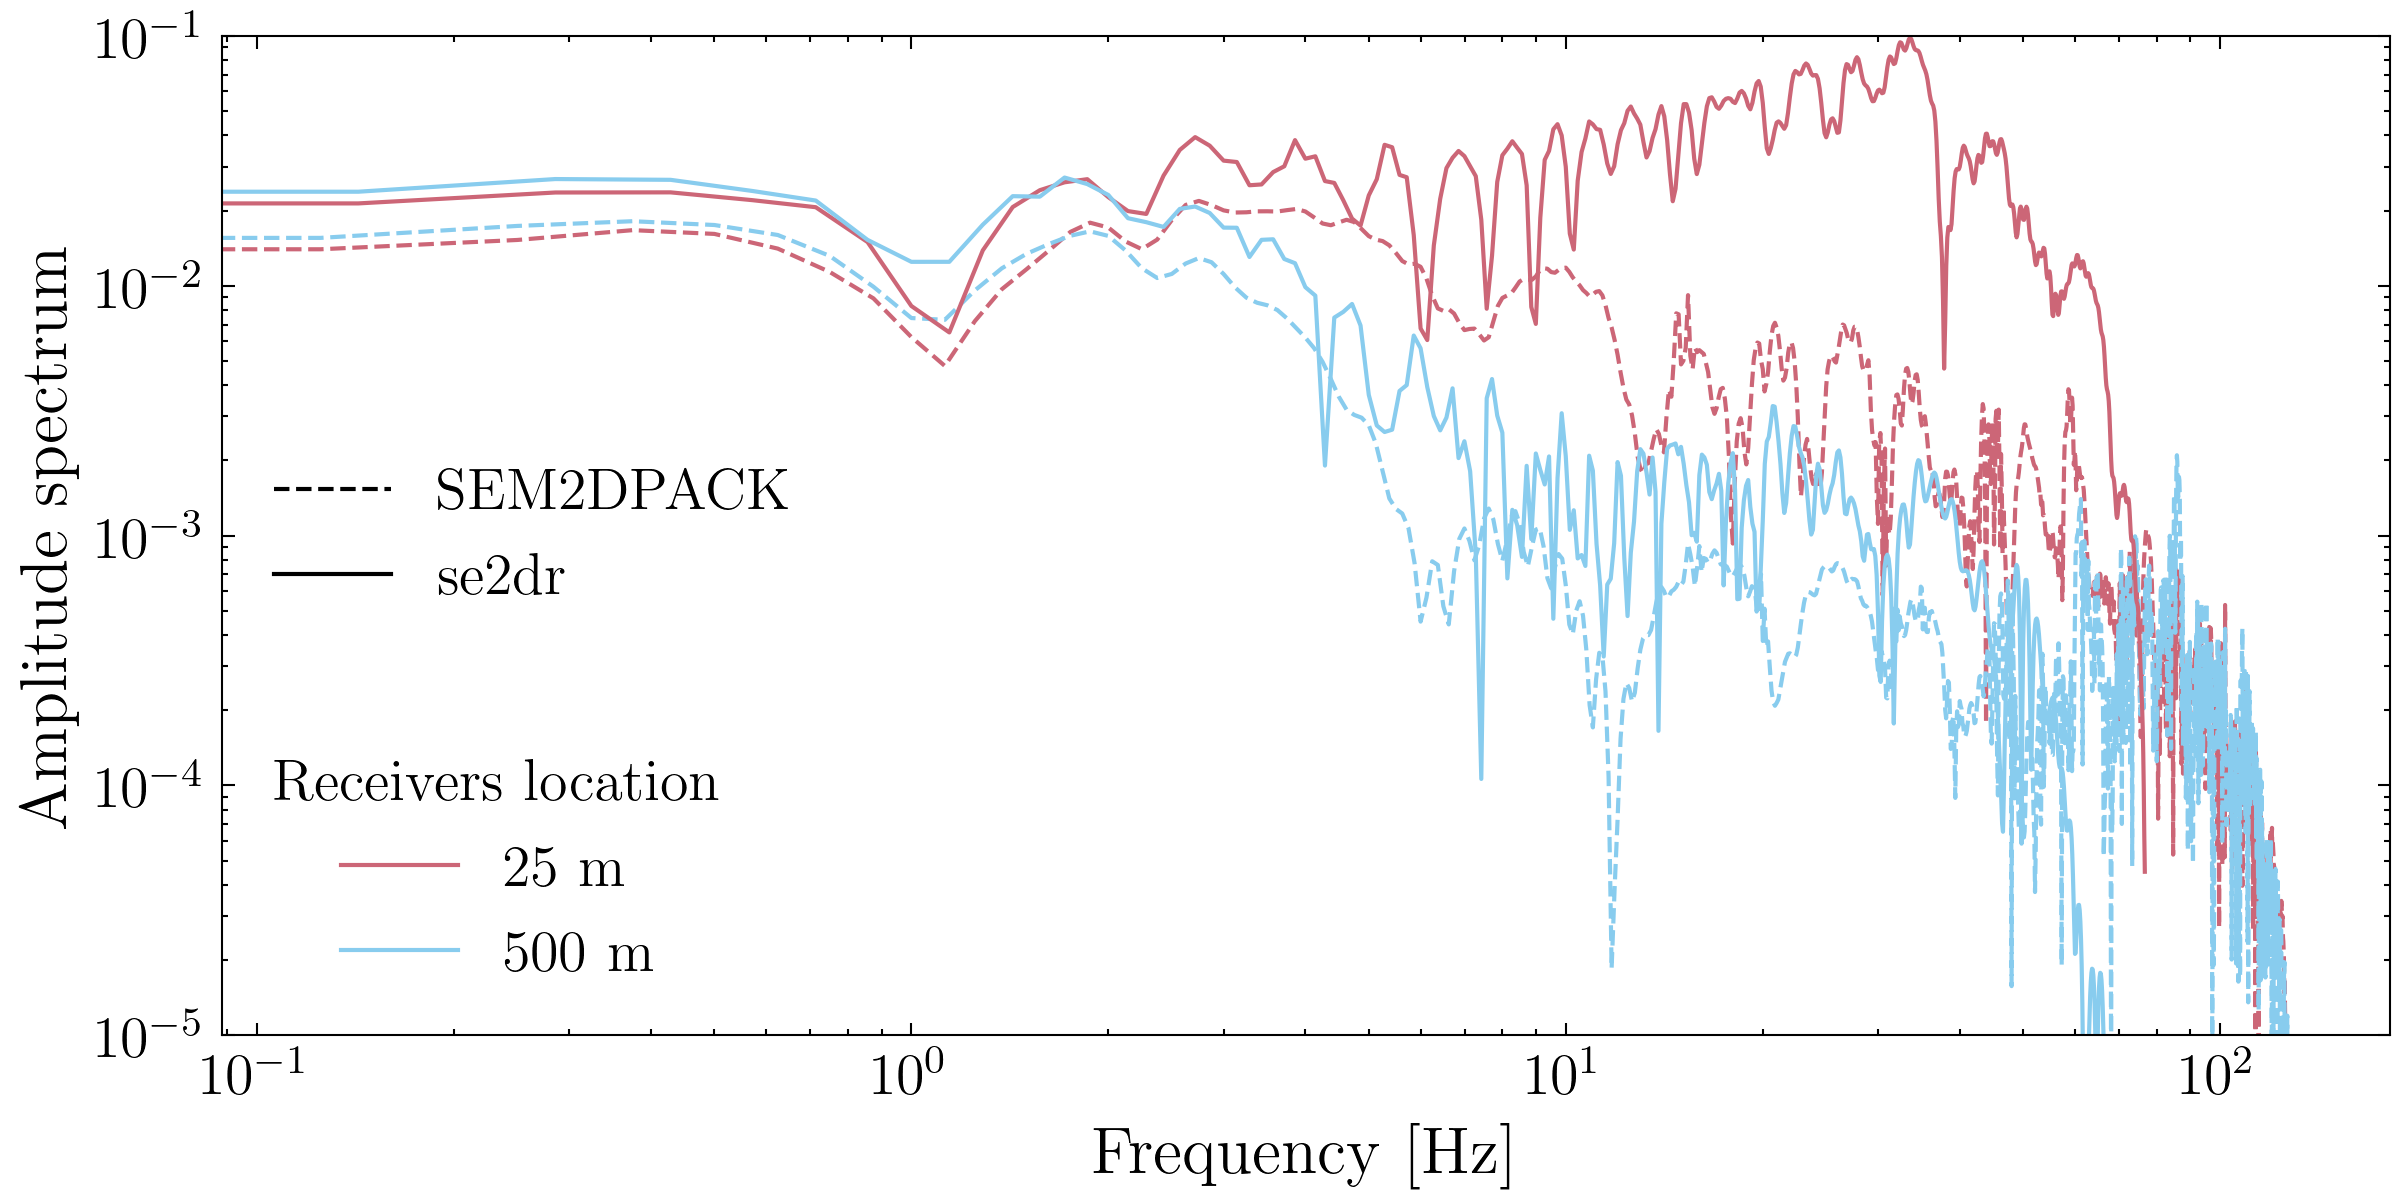

In [8]:
Xloc = 1 # X location index

fig = plt.figure(figsize = (8,4),dpi=300, constrained_layout=True)
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0])


PlotReference(ListReferenceReceivers,ax)
ColIdx = 0
for j in [1,7]: # Y location index
    ColIdx += 1
    Yloc = 5*j
    StationIDX = Xloc + Yloc

    i = StationIDX 
    Ycoord = ListReceivers[i].Coord[1]
    Xcoord = ListReceivers[i].Coord[0]

    Time, Amplitude = SortReceiver(ListReceivers[i],ListReceivers[i].VelY)
    AmplitudeGrad = np.asarray(pd.Series(np.gradient(Amplitude, Time).tolist()))


    print(ListReceivers[i].Coord)

    FreqSamp= 1/(Time[3]-Time[2])
    ax.magnitude_spectrum(AmplitudeGrad,FreqSamp,label='{} m'.format(Ycoord),color=cmap[ColIdx])
    
    
AddStyleLegend(ax)
Format_PlotMagnitudeSpectra(ax)

# Acceleration Information

(2000, 25.0)
(2000, 500.0)
[2000, 25]
[2000, 500]


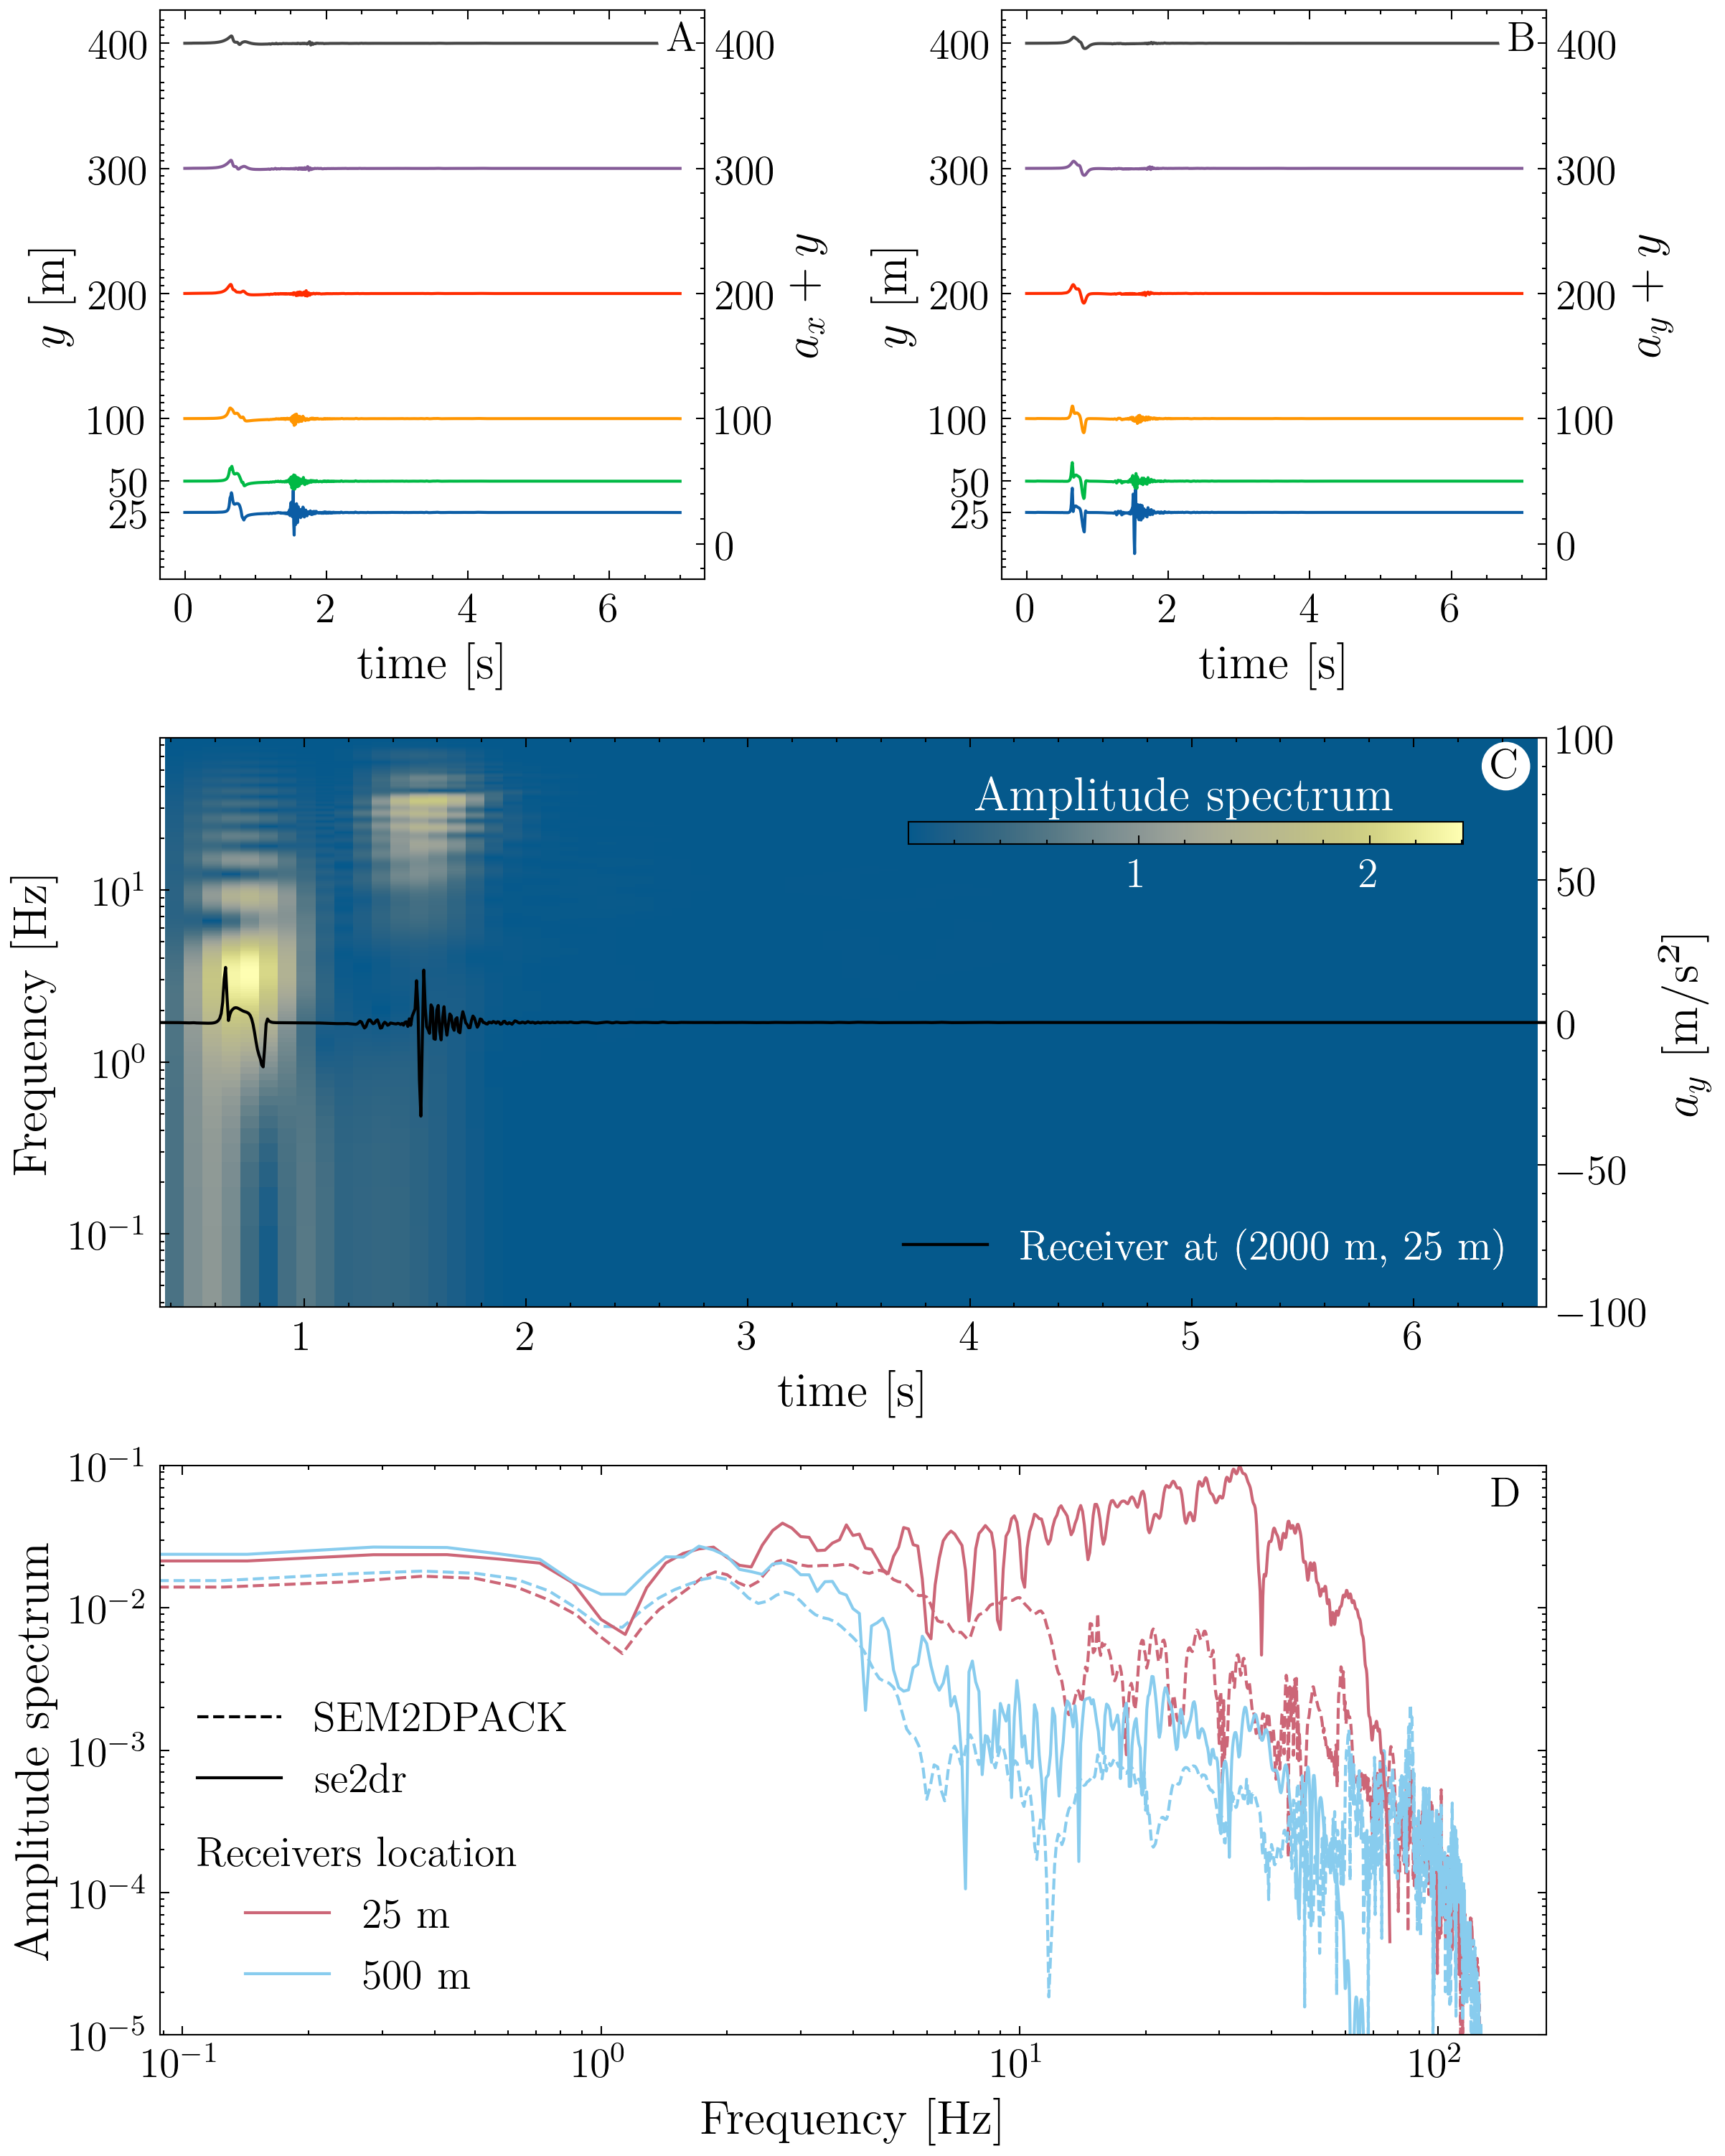

In [11]:


fig = plt.figure(figsize = (8, 10),dpi=300, constrained_layout=True)
gs = fig.add_gridspec(3, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1],sharey=ax1)
axSpec = fig.add_subplot(gs[1, :])
axMagSpec = fig.add_subplot(gs[2, :])


Xloc = 1 # X location index
scaling = 1

################# Acceleration profiles

for j in range(1,7):
    
    Yloc = 5*j
    StationIDX = Xloc + Yloc
    
    Ycoord = float(ListReceivers[StationIDX].Coord[1]/scaling)

    Time, Amplitude = SortReceiver(ListReceivers[StationIDX],ListReceivers[StationIDX].VelX)
    Amplitude = np.asarray(pd.Series(np.gradient(Amplitude, Time).tolist()))
    OffsetAmplitude = list(map(lambda x: x + Ycoord, Amplitude))
    ax1.plot(Time, OffsetAmplitude)
    
    Time, Amplitude = SortReceiver(ListReceivers[StationIDX],ListReceivers[StationIDX].VelY)
    Amplitude = np.asarray(pd.Series(np.gradient(Amplitude, Time).tolist()))
    OffsetAmplitude = list(map(lambda x: x + Ycoord, Amplitude))

    ax2.plot(Time, OffsetAmplitude)
    
Format_ProfilePlot("$a_x + y$", ax1,ListReceivers,Xloc,scaling,nstat=7)
Format_ProfilePlot("$a_y + y$", ax2,ListReceivers,Xloc,scaling,nstat=7)

################# Spectrogram

StationIDX = Xloc + 5*1
axSpec,axSpec2 = Receiver2GradientSpectrogram(ListReceivers[StationIDX], ListReceivers[StationIDX].VelY, 
                                              yLabel="$a_y$ [m/s²]", 
                                              wlen = 40, mult=20, cmap=cmapCont, **{"ax": axSpec})

axSpec.set_xlim([0.35,6.6])
axSpec2.set_ylim([-1e2,1e2])

GetLineReceiver2Legend(axSpec2,ListReceivers,StationIDX,"w")
################ Magnitude spectra

PlotReference(ListReferenceReceivers,axMagSpec)
ColIdx = 0
for j in [1,7]: # Y location index
    ColIdx += 1
    Yloc = 5*j
    i = Xloc + Yloc

    Ycoord = ListReceivers[i].Coord[1]
    Xcoord = ListReceivers[i].Coord[0]

    Time, Amplitude = SortReceiver(ListReceivers[i],ListReceivers[i].VelY)
    AmplitudeGrad = np.asarray(pd.Series(np.gradient(Amplitude, Time).tolist()))


    print(ListReceivers[i].Coord)

    FreqSamp= 1/(Time[3]-Time[2])
    axMagSpec.magnitude_spectrum(AmplitudeGrad,FreqSamp,label='{} m'.format(Ycoord),color=cmap[ColIdx])
    
    
AddStyleLegend(axMagSpec)
Format_PlotMagnitudeSpectra(axMagSpec)


AxisList=[ax1,ax2]
LabelizeAxisList(AxisList,Pos=[0.93, 0.93],bbox=dict(boxstyle="circle,pad=0.1",facecolor='white',ec="b", lw=0))
AxisList=[axSpec,axMagSpec]
LabelizeAxisList(AxisList,Pos=[0.96, 0.93], OffsetLabel=2,
                 bbox=dict(boxstyle="circle,pad=0.1",facecolor='white',ec="b", lw=0))

# Velocity Information

(2000, 25.0)
(2000, 500.0)


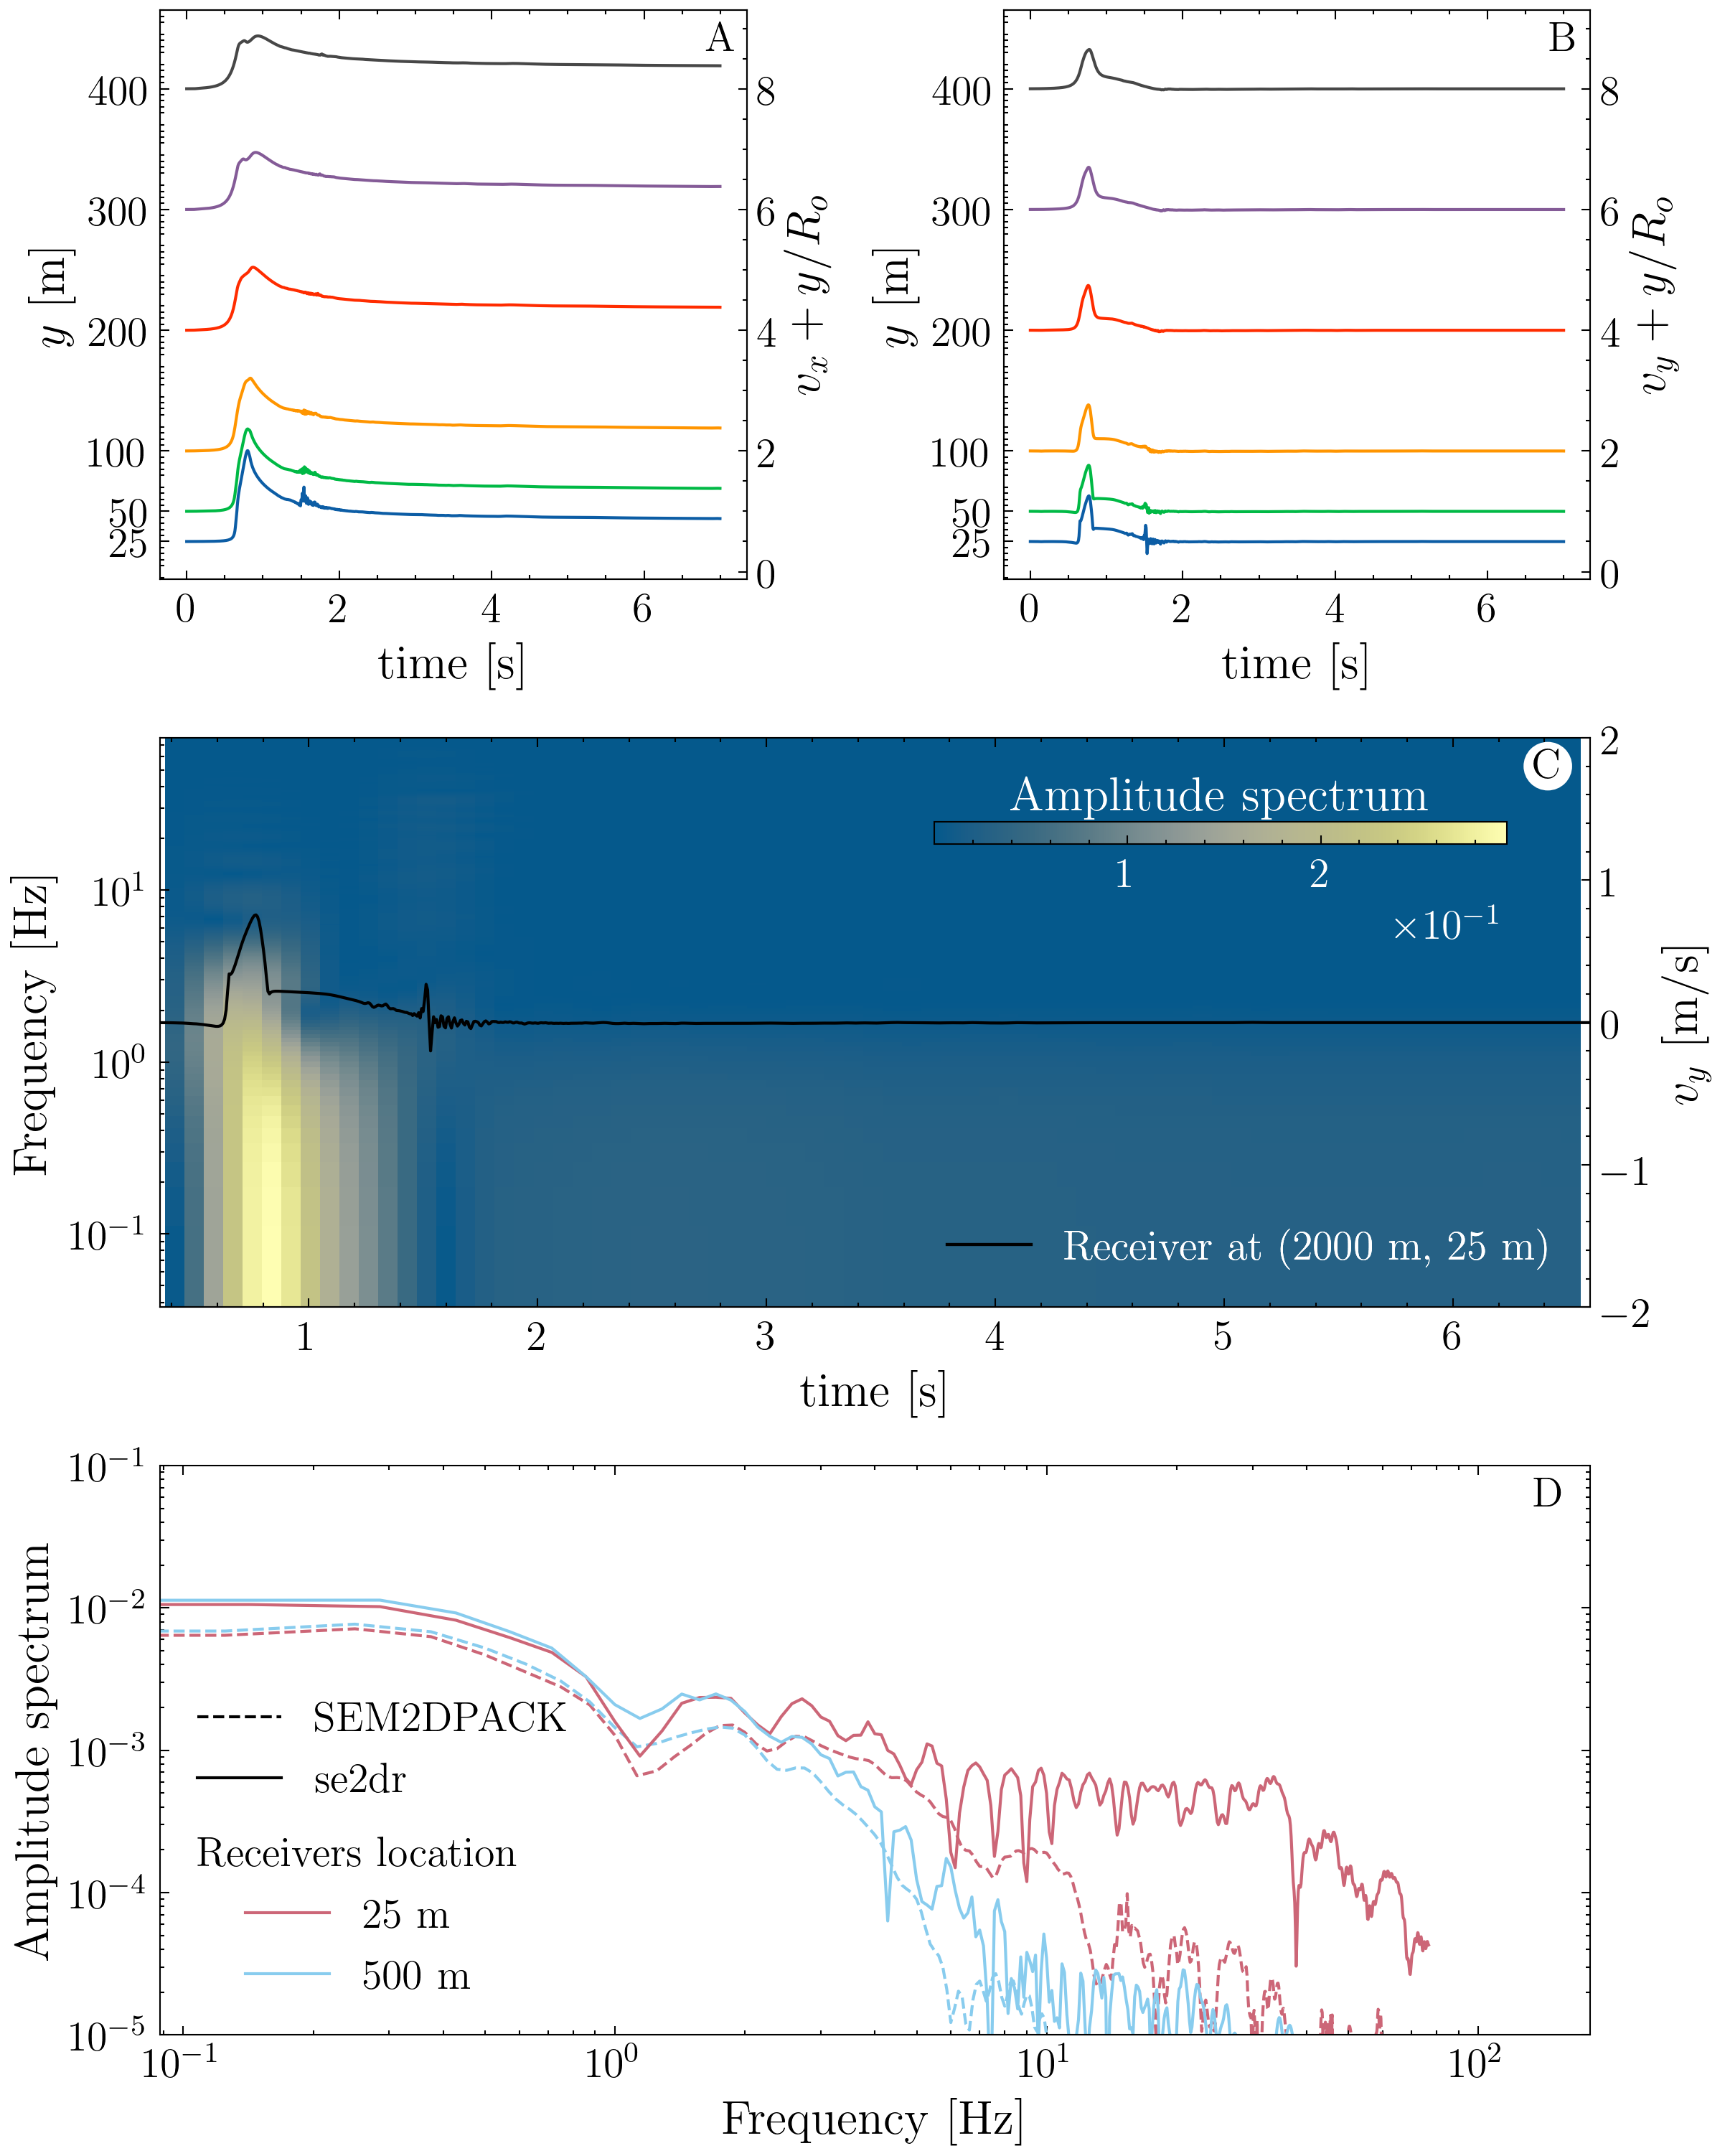

In [12]:


fig = plt.figure(figsize = (8, 10),dpi=300, constrained_layout=True)
gs = fig.add_gridspec(3, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1],sharey=ax1)
axSpec = fig.add_subplot(gs[1, :])
axMagSpec = fig.add_subplot(gs[2, :])


Xloc = 1 # X location index
scaling = 50

################# Acceleration profiles

for j in range(1,7):
    
    Yloc = 5*j
    StationIDX = Xloc + Yloc
    
    Ycoord = float(ListReceivers[StationIDX].Coord[1]/scaling)

    Time, Amplitude = SortReceiver(ListReceivers[StationIDX],ListReceivers[StationIDX].VelX)
    OffsetAmplitude = list(map(lambda x: x + Ycoord, Amplitude))
    ax1.plot(Time, OffsetAmplitude)
    
    Time, Amplitude = SortReceiver(ListReceivers[StationIDX],ListReceivers[StationIDX].VelY)
    OffsetAmplitude = list(map(lambda x: x + Ycoord, Amplitude))

    ax2.plot(Time, OffsetAmplitude)
    
Format_ProfilePlot("$v_x + y/R_o$", ax1,ListReceivers,Xloc,scaling,nstat=7)
Format_ProfilePlot("$v_y + y/R_o$", ax2,ListReceivers,Xloc,scaling,nstat=7)

################# Spectrogram

StationIDX = Xloc + 5*1
axSpec,axSpec2 = Receiver2Spectrogram(ListReceivers[StationIDX], ListReceivers[StationIDX].VelY, 
                                      yLabel="$v_y$ [m/s]", 
                                      wlen = 40, mult=20, cmap=cmapCont, **{"ax": axSpec})

axSpec.set_xlim([0.35,6.6])
axSpec2.set_ylim([-0.2e1,0.2e1])

GetLineReceiver2Legend(axSpec2,ListReceivers,StationIDX,"w")
################ Magnitude spectra

PlotReference(ListReferenceReceivers,axMagSpec,Gradient=False)
ColIdx = 0
for j in [1,7]: # Y location index
    ColIdx += 1
    Yloc = 5*j
    i = Xloc + Yloc

    Ycoord = ListReceivers[i].Coord[1]
    Xcoord = ListReceivers[i].Coord[0]

    Time, Amplitude = SortReceiver(ListReceivers[i],ListReceivers[i].VelY)

    FreqSamp= 1/(Time[3]-Time[2])
    axMagSpec.magnitude_spectrum(Amplitude,FreqSamp,label='{} m'.format(Ycoord),color=cmap[ColIdx])
    
    
AddStyleLegend(axMagSpec)
Format_PlotMagnitudeSpectra(axMagSpec)


AxisList=[ax1,ax2]
LabelizeAxisList(AxisList,Pos=[0.93, 0.93],bbox=dict(boxstyle="circle,pad=0.1",facecolor='white',ec="b", lw=0))
AxisList=[axSpec,axMagSpec]
LabelizeAxisList(AxisList,Pos=[0.96, 0.93], OffsetLabel=2,
                 bbox=dict(boxstyle="circle,pad=0.1",facecolor='white',ec="b", lw=0))